In [1]:
import os
import rasterio
import numpy as np
import re
from rasterio.mask import mask
from rasterio.io import MemoryFile
import geopandas as gpd
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sns


In [ ]:


def list_files_in_folder(folder_path):
    try:
        files = os.listdir(folder_path)
        return files
    except FileNotFoundError:
        return "Folder not found."




In [14]:
folder_path = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-10-01"
files = list_files_in_folder(folder_path)


In [15]:
files

['predict_lmh100120_g1g3_treated.tif',
 'predict_lmh100120_g1g3_untreated.tif',
 'predict_lmh100120_treated.tif',
 'predict_lmh100120_untreated.tif',
 'prob_high100120_g1g3_treated.tif',
 'prob_high100120_g1g3_untreated.tif',
 'prob_high100120_treated.tif',
 'prob_high100120_untreated.tif']

In [16]:
folder_path = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-12-16"
files = list_files_in_folder(folder_path)


In [17]:
files

['predict_lmh121620_g1g3_treated.tif',
 'predict_lmh121620_g1g3_untreated.tif',
 'predict_lmh121620_treated.tif',
 'predict_lmh121620_untreated.tif',
 'prob_high121620_g1g3_treated.tif',
 'prob_high121620_g1g3_untreated.tif',
 'prob_high121620_treated.tif',
 'prob_high121620_untreated.tif']

In [ ]:
""" october_folder = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-10-01"
december_folder = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-12-16"      
output_folder = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\difference"          """

In [ ]:
""" oct_files = [f for f in os.listdir(october_folder) if f.endswith('.tif') and '.aux.' not in f]
dec_files = [f for f in os.listdir(december_folder) if f.endswith('.tif') and '.aux.' not in f] """


In [ ]:
""" # Helper function to remove the date part from the filename
def extract_common_part(filename):
    # This assumes the filename structure is like "predict_lmh100120_treated.tif"
    # and that you want to remove the date (here "100120" or "121620")
    parts = filename.split('_')
    # e.g., parts = ['predict', 'lmh100120', 'treated.tif']
    # Remove the date digits from the second part
    common = parts[0] + '_' + parts[1][4:] + '_' + parts[2]
    return common """

In [ ]:
""" # Function to remove the 6-digit date from the filename
def extract_common_part(filename):
    # This regex splits the filename into three parts:
    #   1. Non-digit characters at the start (e.g., "predict_lmh")
    #   2. A 6-digit number (the date, e.g., "100120")
    #   3. The rest of the filename (e.g., "_g1g3_treated.tif")
    # We then remove the date part.
    common = re.sub(r'(\D+)(\d{6})(.*)', r'\1\3', filename)
    return common """

In [ ]:
""" # Create dictionaries to map common parts to filenames
oct_dict = {extract_common_part(f): f for f in oct_files}
dec_dict = {extract_common_part(f): f for f in dec_files} """

In [ ]:
""" # Loop through matching files and compute the difference
for key, oct_filename in oct_dict.items():
    if key in dec_dict:
        dec_filename = dec_dict[key]
        oct_path = os.path.join(october_folder, oct_filename)
        dec_path = os.path.join(december_folder, dec_filename)
        
        # Open October file
        with rasterio.open(oct_path) as src_oct:
            oct_data = src_oct.read(1)  # read first band
            profile = src_oct.profile
        
        # Open December file
        with rasterio.open(dec_path) as src_dec:
            dec_data = src_dec.read(1)
        
        # Calculate the difference (October minus December)
        diff_data = oct_data - dec_data
        
        # Define the output filename (e.g., "diff_predict_...tif")
        output_filename = f"diff_{oct_filename}"
        output_path = os.path.join(output_folder, output_filename)
        
        # Write the result
        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(diff_data, 1)
        
        print(f"Processed {oct_filename} and {dec_filename} -> {output_filename}")
    else:
        print(f"No matching December file found for {oct_filename}") """

No matching December file found for predict_lmh100120_g1g3_untreated.tif
No matching December file found for predict_lmh100120_treated.tif
No matching December file found for predict_lmh100120_untreated.tif
No matching December file found for prob_high100120_g1g3_untreated.tif
No matching December file found for prob_high100120_treated.tif
No matching December file found for prob_high100120_untreated.tif


In [ ]:
""" # Process each matching pair
for key, oct_filename in oct_dict.items():
    if key in dec_dict:
        dec_filename = dec_dict[key]
        oct_path = os.path.join(october_folder, oct_filename)
        dec_path = os.path.join(december_folder, dec_filename)
        
        # Open the October file and read the data
        with rasterio.open(oct_path) as src_oct:
            oct_data = src_oct.read(1)  # Assuming single-band; adjust if necessary
            profile = src_oct.profile
        
        # Open the December file and read the data
        with rasterio.open(dec_path) as src_dec:
            dec_data = src_dec.read(1)
        
        # Check for shape mismatch before subtraction
        if oct_data.shape != dec_data.shape:
            print(f"Shape mismatch detected:")
            print(f"  October file: {oct_filename} has shape {oct_data.shape}")
            print(f"  December file: {dec_filename} has shape {dec_data.shape}")
            # Optionally, continue to the next file pair without processing this pair:
            continue
        
        # If shapes match, calculate the difference: October minus December
        diff_data = oct_data - dec_data
        
        # Define the output filename (e.g., prefix with "diff_")
        output_filename = f"diff_{oct_filename}"
        output_path = os.path.join(output_folder, output_filename)
        
        # Write the difference image to disk
        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(diff_data, 1)
        
        print(f"Processed: {oct_filename} and {dec_filename} -> {output_filename}")
    else:
        print(f"No matching December file found for {oct_filename}") """


Shape mismatch detected:
  October file: predict_lmh100120_g1g3_treated.tif has shape (1485, 1410)
  December file: predict_lmh121620_g1g3_treated.tif has shape (1484, 1408)
Processed: predict_lmh100120_g1g3_untreated.tif and predict_lmh121620_g1g3_untreated.tif -> diff_predict_lmh100120_g1g3_untreated.tif
Shape mismatch detected:
  October file: predict_lmh100120_treated.tif has shape (2728, 3748)
  December file: predict_lmh121620_treated.tif has shape (2726, 3746)
Processed: predict_lmh100120_untreated.tif and predict_lmh121620_untreated.tif -> diff_predict_lmh100120_untreated.tif
Processed: prob_high100120_g1g3_treated.tif and prob_high121620_g1g3_treated.tif -> diff_prob_high100120_g1g3_treated.tif
Processed: prob_high100120_g1g3_untreated.tif and prob_high121620_g1g3_untreated.tif -> diff_prob_high100120_g1g3_untreated.tif
Processed: prob_high100120_treated.tif and prob_high121620_treated.tif -> diff_prob_high100120_treated.tif
Processed: prob_high100120_untreated.tif and prob_hi

"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-10-01\Iteration_00\Predict_LMH.tif"
"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-10-01\Iteration_00\ProbHigh.tif"
"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-12-16\Iteration_00\Predict_LMH.tif"
"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-12-16\Iteration_00\ProbHigh.tif"

# Seasonal Difference

In [2]:
def crop_with_vector(diff_data, profile, raster_crs, geom):
    """
    Crop a raster (given as diff_data and profile) using the provided geometry.
    """
    with MemoryFile() as memfile:
        with memfile.open(**profile) as dataset:
            dataset.write(diff_data, 1)
            masked_data, masked_transform = mask(dataset, [geom], crop=True, nodata=profile.get('nodata'))
    new_profile = profile.copy()
    new_profile.update({
        "height": masked_data.shape[1],
        "width": masked_data.shape[2],
        "transform": masked_transform
    })
    return masked_data, new_profile

def process_difference(oct_file, dec_file, output_base, vector_gpkg, layers):
    """
    Compute the difference of two rasters (October minus December) and crop the result separately
    using each vector layer provided. The output files will be named as:
       <output_base>_<layer_name>.tif
    """
    # Open October raster and get its data and profile.
    with rasterio.open(oct_file) as src_oct:
        oct_data = src_oct.read(1)
        profile = src_oct.profile
        raster_crs = src_oct.crs

    # Open December raster.
    with rasterio.open(dec_file) as src_dec:
        dec_data = src_dec.read(1)

    # Check for matching dimensions.
    if oct_data.shape != dec_data.shape:
        raise ValueError(f"Dimension mismatch:\n  {oct_file} has {oct_data.shape}\n  {dec_file} has {dec_data.shape}")

    # Compute the difference (October minus December).
    diff_data = oct_data - dec_data

    # Process each vector layer separately.
    for layer in layers:
        # Read the vector layer from the geopackage.
        gdf = gpd.read_file(vector_gpkg, layer=layer)
        # Reproject to raster CRS if needed.
        if gdf.crs != raster_crs:
            gdf = gdf.to_crs(raster_crs)
        # Use all features in the layer (if more than one, their union will be used for masking).
        geom = gdf.unary_union

        # Crop the difference raster using the current geometry.
        masked_data, new_profile = crop_with_vector(diff_data, profile, raster_crs, geom)

        # Define the output filename.
        output_filename = f"{output_base}_{layer}.tif"
        with rasterio.open(output_filename, 'w', **new_profile) as dst:
            dst.write(masked_data)
        print(f"Saved cropped difference to: {output_filename}")

In [8]:
def process_difference(oct_file, dec_file, output_base, vector_gpkg, layers):
    """
    Compute the difference of two rasters (October minus December) and crop the result separately
    using each vector layer provided. The output files will be named as:
       <output_base>_<treated/untreated>_<layer_name>.tif

    Parameters:
      oct_file     - Path to the October raster.
      dec_file     - Path to the December raster.
      output_base  - Base path and filename prefix for the output files.
      vector_gpkg  - Path to the geopackage containing vector layers.
      layers       - List of layer names to use for cropping.
    """
    # Open October raster and get its data and profile.
    with rasterio.open(oct_file) as src_oct:
        oct_data = src_oct.read(1)
        profile = src_oct.profile
        raster_crs = src_oct.crs

    # Open December raster.
    with rasterio.open(dec_file) as src_dec:
        dec_data = src_dec.read(1)

    # Check for matching dimensions.
    if oct_data.shape != dec_data.shape:
        raise ValueError(f"Dimension mismatch:\n  {oct_file} has {oct_data.shape}\n  {dec_file} has {dec_data.shape}")

    # Compute the difference (October minus December).
    diff_data = oct_data - dec_data

    # Determine the type ("treated" or "untreated") based on the October filename.
    file_type = "unknown"
    lower_oct = oct_file.lower()
    if "untreated" in lower_oct:
        file_type = "untreated"
    elif "treated" in lower_oct:
        file_type = "treated"

    # Process each vector layer separately.
    for layer in layers:
        # Read the vector layer from the geopackage.
        gdf = gpd.read_file(vector_gpkg, layer=layer)
        # Reproject to raster CRS if needed.
        if gdf.crs != raster_crs:
            gdf = gdf.to_crs(raster_crs)
        # Use all features in the layer (their union will be used for masking).
        geom = gdf.union_all()

        # Crop the difference raster using the current geometry.
        masked_data, new_profile = crop_with_vector(diff_data, profile, raster_crs, geom)

        # Define the output filename with treated/untreated information.
        output_filename = f"{output_base}_{file_type}_{layer}.tif"
        # Ensure the output directory exists.
        out_dir = os.path.dirname(output_filename)
        os.makedirs(out_dir, exist_ok=True)

        # Write the cropped difference to the file.
        with rasterio.open(output_filename, 'w', **new_profile) as dst:
            dst.write(masked_data)
        print(f"Saved cropped difference to: {output_filename}")

In [12]:
# Define the vector geopackage and the two layers to use for cropping.
vector_gpkg = r"C:\Users\bsf31\Documents\data\NL050\disaster_resilience.gpkg"
#layers = ["small_group_union", "sbco_mainland_coastclip_epsg4326"]
layers = ["small_group_union"]



In [5]:
# Define base output names (ensure the output directory exists).
output_base_predict = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_Predict_LMH"
output_base_probhigh = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_ProbHigh"


In [6]:
predict_oct = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-10-01\Iteration_00\Predict_LMH.tif"
predict_dec = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-12-16\Iteration_00\Predict_LMH.tif"
probhigh_oct = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-10-01\Iteration_00\ProbHigh.tif"
probhigh_dec = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-12-16\Iteration_00\ProbHigh.tif"


In [9]:
# Process the Predict_LMH product.
process_difference(predict_oct, predict_dec, output_base_predict, vector_gpkg, layers)


Saved cropped difference to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_Predict_LMH_treated_small_group_union.tif
Saved cropped difference to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_Predict_LMH_treated_sbco_mainland_coastclip_epsg4326.tif


In [10]:
# Process the ProbHigh product.
process_difference(probhigh_oct, probhigh_dec, output_base_probhigh, vector_gpkg, layers)

Saved cropped difference to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_ProbHigh_treated_small_group_union.tif
Saved cropped difference to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_ProbHigh_treated_sbco_mainland_coastclip_epsg4326.tif


In [13]:
predict_oct = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Untreated\2020-10-01\Iteration_00\Predict_LMH.tif"
predict_dec = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Untreated\2020-12-16\Iteration_00\Predict_LMH.tif"
probhigh_oct = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Untreated\2020-10-01\Iteration_00\ProbHigh.tif"
probhigh_dec = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Untreated\2020-12-16\Iteration_00\ProbHigh.tif"

In [14]:
process_difference(predict_oct, predict_dec, output_base_predict, vector_gpkg, layers)

Saved cropped difference to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_Predict_LMH_untreated_small_group_union.tif


In [15]:
# Process the ProbHigh product.
process_difference(probhigh_oct, probhigh_dec, output_base_probhigh, vector_gpkg, layers)

Saved cropped difference to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\diff_cropped_ProbHigh_untreated_small_group_union.tif


# Treatment Difference

In [19]:
def clip_raster(raster_file, geometry):
    """
    Opens a raster, clips it to the provided geometry, and returns
    the clipped array (with shape (1, height, width)) and an updated profile.
    """
    with rasterio.open(raster_file) as src:
        # Use the source object directly with mask
        clipped_data, clipped_transform = mask(src, [geometry], crop=True, nodata=src.profile.get('nodata'))
        profile = src.profile.copy()
    # Ensure the output array has shape (1, height, width)
    if clipped_data.ndim == 4:
        # Sometimes mask returns (1, 1, H, W)
        if clipped_data.shape[1] == 1:
            clipped_data = np.squeeze(clipped_data, axis=1)
    elif clipped_data.ndim == 2:
        clipped_data = np.expand_dims(clipped_data, axis=0)
    # Update the profile to reflect new dimensions and transform.
    profile.update({
        "height": clipped_data.shape[1],
        "width": clipped_data.shape[2],
        "transform": clipped_transform
    })
    return clipped_data, profile

In [17]:
# Base directories for original data.
treated_base = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated"
untreated_base = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Untreated"

# Output root folder.
output_root = r"C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped"

# Geopackage and vector layer for clipping.
gpkg_file = r"C:\Users\bsf31\Documents\data\NL050\disaster_resilience.gpkg"
layer_name = "small_group_union"
gdf = gpd.read_file(gpkg_file, layer=layer_name)
# Use the union of all features in the layer.
# (If you get a deprecation warning, you can use gdf.union_all() if available)
geometry = gdf.union_all()

# The products to process.
products = ["Predict_LMH.tif", "ProbHigh.tif"]

In [13]:
# List all date folders in the Treated directory (assumed identical in Untreated).
date_dirs = sorted(os.listdir(treated_base))

## Clipped Rasters

In [22]:
# Process each base directory (Treated and Untreated).
for base, base_label in [(treated_base, "Treated"), (untreated_base, "Untreated")]:
    date_dirs = sorted(os.listdir(base))
    for date_dir in date_dirs:
        iter_path = os.path.join(base, date_dir, "Iteration_00")
        if not os.path.isdir(iter_path):
            print(f"Skipping {date_dir} as Iteration_00 folder is missing.")
            continue
        
        for product in products:
            file_path = os.path.join(iter_path, product)
            if not os.path.isfile(file_path):
                print(f"Missing file: {file_path}")
                continue
            
            # Clip the raster using the specified geometry.
            clipped_data, clipped_profile = clip_raster(file_path, geometry)
            
            # Define the output filename.
            out_file = os.path.join(output_root, date_dir, f"{base_label}_{product.replace('.tif','')}_clipped.tif")
            os.makedirs(os.path.dirname(out_file), exist_ok=True)
            
            # Write the clipped raster.
            with rasterio.open(out_file, 'w', **clipped_profile) as dst:
                dst.write(clipped_data)
            print(f"Saved clipped raster to: {out_file}")

Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped\2020-01-01\Treated_Predict_LMH_clipped.tif
Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped\2020-01-01\Treated_ProbHigh_clipped.tif
Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped\2020-01-16\Treated_Predict_LMH_clipped.tif
Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped\2020-01-16\Treated_ProbHigh_clipped.tif
Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped\2020-02-01\Treated_Predict_LMH_clipped.tif
Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped\2020-02-01\Treated_ProbHigh_clipped.tif
Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps_clipped\2020-02-16\Treated_Predict_LMH_clipped.tif
Saved clipped raster to: C:\Users\bsf31\Documents\data\NL050\output\Dif

In [25]:
# Folder where your clipped rasters are stored.
clipped_output_root = r"C:\Users\bsf31\Documents\data\NL050\output\ClippedRasters"

# Folder to store the difference maps.
difference_output_root = r"C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps"

# The products to process.
products = ["Predict_LMH.tif", "ProbHigh.tif"]

# List all date folders in the clipped folder.
date_dirs = sorted(os.listdir(clipped_output_root))

for date_dir in date_dirs:
    date_path = os.path.join(clipped_output_root, date_dir)
    for product in products:
        product_name = product.replace(".tif", "")
        
        untreated_file = os.path.join(date_path, f"Untreated_{product_name}_clipped.tif")
        treated_file   = os.path.join(date_path, f"Treated_{product_name}_clipped.tif")
        
        if not os.path.exists(untreated_file) or not os.path.exists(treated_file):
            print(f"Missing file for {date_dir} product {product}")
            continue
        
        # Open the untreated clipped raster.
        with rasterio.open(untreated_file) as src_u:
            untreated_data = src_u.read(1, masked= True)  # read first band (2D array)
            profile = src_u.profile
        
        # Open the treated clipped raster.
        with rasterio.open(treated_file) as src_t:
            treated_data = src_t.read(1, masked=True)
        
        # Check that the dimensions match.
        if untreated_data.shape != treated_data.shape:
            print(f"Shape mismatch in {date_dir} for {product}, skipping")
            continue
        
        # Compute the difference: untreated minus treated.
        diff_data = untreated_data - treated_data
        
        # Construct the output file path.
        diff_out_file = os.path.join(difference_output_root, date_dir, f"{product_name}_diff.tif")
        os.makedirs(os.path.dirname(diff_out_file), exist_ok=True)
        
        # Write out the difference raster.
        with rasterio.open(diff_out_file, 'w', **profile) as dst:
            dst.write(diff_data, 1)
        print(f"Saved difference map: {diff_out_file}")

Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-01-01\Predict_LMH_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-01-01\ProbHigh_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-01-16\Predict_LMH_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-01-16\ProbHigh_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-02-01\Predict_LMH_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-02-01\ProbHigh_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-02-16\Predict_LMH_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-02-16\ProbHigh_diff.tif
Saved difference map: C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps\2020-03-01\Predict_LMH_diff.tif
Save

# Treatment difference stats

In [26]:
# Define the root folder where your difference maps are stored.
diff_root = r"C:\Users\bsf31\Documents\data\NL050\output\DifferenceMaps"

# List to store statistics for each file.
stats_list = []
# List to accumulate all valid (unmasked) values for a global histogram.
all_values = []

In [27]:
# Walk through the directory tree and process each .tif file.
for root, dirs, files in os.walk(diff_root):
    for file in files:
        if file.lower().endswith('.tif'):
            file_path = os.path.join(root, file)
            try:
                with rasterio.open(file_path) as src:
                    # Read as a masked array so nodata values are automatically ignored.
                    data = src.read(1, masked=True)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            # Compute statistics on valid (unmasked) data.
            min_val    = data.min()
            max_val    = data.max()
            mean_val   = data.mean()
            median_val = np.ma.median(data)
            std_val    = data.std()
            
            stats_list.append({
                'file': file,
                'path': file_path,
                'min': float(min_val),
                'max': float(max_val),
                'mean': float(mean_val),
                'median': float(median_val),
                'std': float(std_val)
            })
            
            # Append valid values for a global histogram.
            all_values.extend(data.compressed())  # data.compressed() returns a 1D numpy array of valid pixels.


In [ ]:
df_stats = pd.DataFrame(stats_list)

In [32]:
print("Summary Statistics for Difference Maps:")
df_stats

Summary Statistics for Difference Maps:


,file,path,min,max,mean,median,std
0,Predict_LMH_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.016164,0.035128,0.002697,0.000184,0.004485
1,ProbHigh_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.081951,0.173220,0.004123,0.000000,0.014391
2,Predict_LMH_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.016064,0.034997,0.002686,0.000183,0.004467
3,ProbHigh_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.088198,0.170836,0.004498,0.000000,0.015714
4,Predict_LMH_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.015979,0.034646,0.002663,0.000182,0.004429
5,ProbHigh_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.080843,0.173579,0.004571,0.000000,0.015696
6,Predict_LMH_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.015963,0.034590,0.002660,0.000182,0.004422
7,ProbHigh_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.090991,0.173330,0.005061,0.000000,0.017521
8,Predict_LMH_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.015986,0.034771,0.002669,0.000182,0.004438
9,ProbHigh_diff.tif,C:\Users\bsf31\Documents\data\NL050\output\Dif...,-0.077902,0.172452,0.004352,0.000000,0.015032


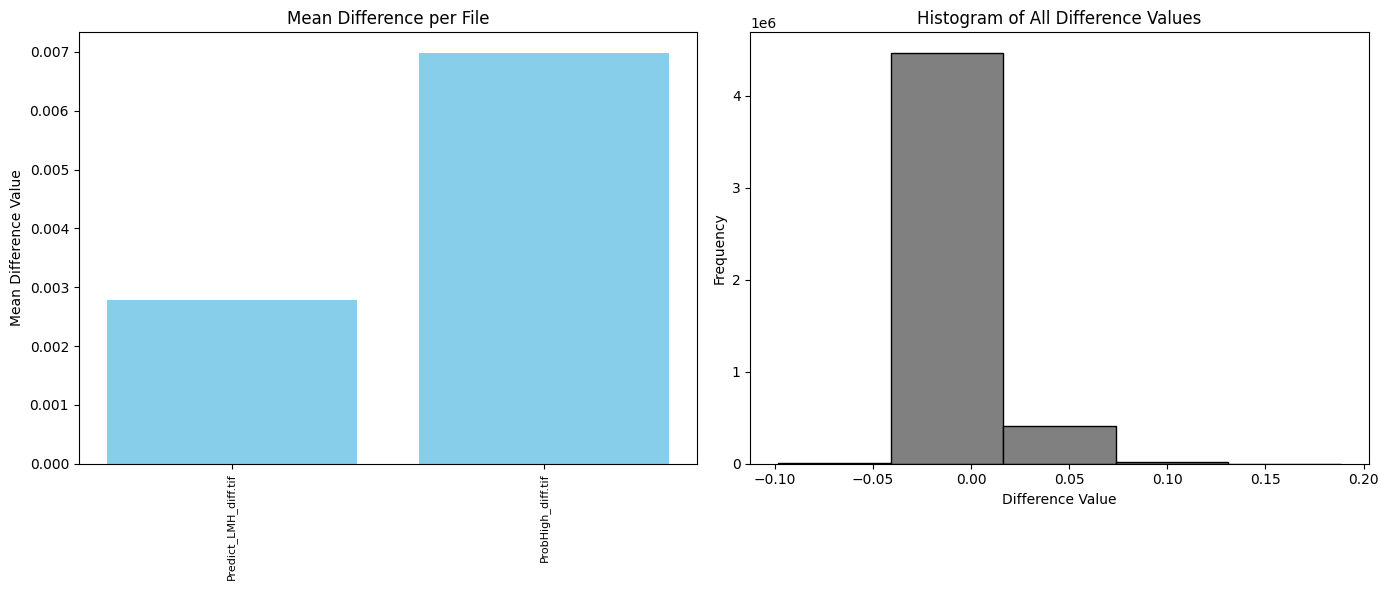

In [48]:
plt.figure(figsize=(14, 6))
# Subplot 1: Bar chart of the mean difference for each file.
plt.subplot(1, 2, 1)
plt.bar(df_stats['file'], df_stats['mean'], color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Mean Difference Value")
plt.title("Mean Difference per File")

# Subplot 2: Global histogram of all valid difference values.
plt.subplot(1, 2, 2)
plt.hist(all_values, bins=5, color='gray', edgecolor='black')
plt.title("Histogram of All Difference Values")
plt.xlabel("Difference Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [36]:
df_stats['date'] = df_stats['path'].apply(lambda p: os.path.basename(os.path.dirname(p)))
df_stats['date'] = pd.to_datetime(df_stats['date'], errors='coerce')


In [38]:
def extract_product(fname):
    if "Predict_LMH" in fname:
        return "Predict_LMH"
    elif "ProbHigh" in fname:
        return "ProbHigh"
    else:
        return "Other"


In [ ]:
df_stats['product'] = df_stats['file'].apply(extract_product)

In [40]:
df_stats[['file', 'date', 'mean', 'product']]

,file,date,mean,product
0,Predict_LMH_diff.tif,2020-01-01,0.002697,Predict_LMH
1,ProbHigh_diff.tif,2020-01-01,0.004123,ProbHigh
2,Predict_LMH_diff.tif,2020-01-16,0.002686,Predict_LMH
3,ProbHigh_diff.tif,2020-01-16,0.004498,ProbHigh
4,Predict_LMH_diff.tif,2020-02-01,0.002663,Predict_LMH
5,ProbHigh_diff.tif,2020-02-01,0.004571,ProbHigh
6,Predict_LMH_diff.tif,2020-02-16,0.002660,Predict_LMH
7,ProbHigh_diff.tif,2020-02-16,0.005061,ProbHigh
8,Predict_LMH_diff.tif,2020-03-01,0.002669,Predict_LMH
9,ProbHigh_diff.tif,2020-03-01,0.004352,ProbHigh


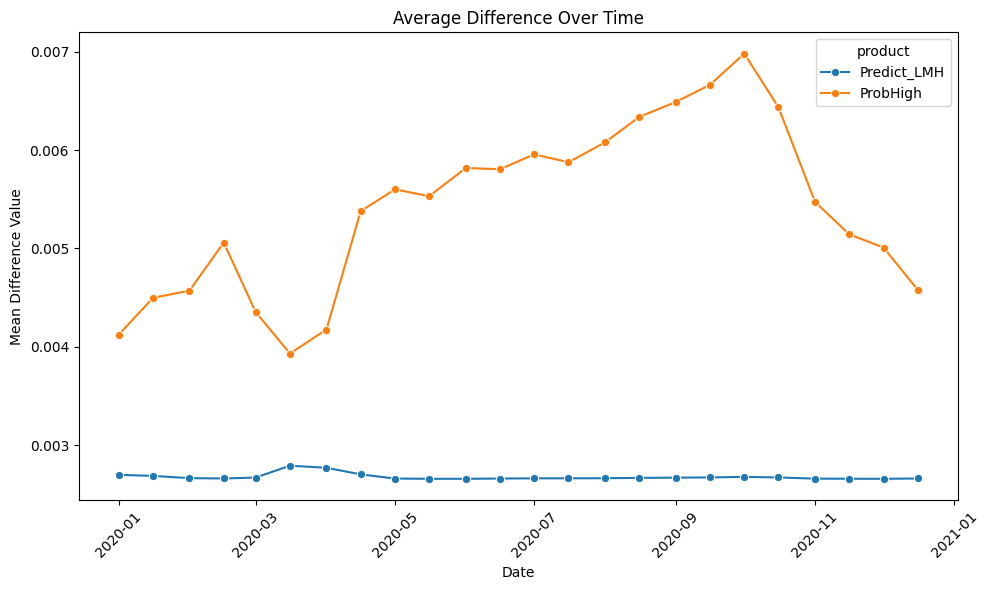

In [55]:
# Plot the average (mean) difference over time, grouping by product.
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_stats, x='date', y='mean', hue='product', marker='o')
plt.title("Average Difference Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Difference Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

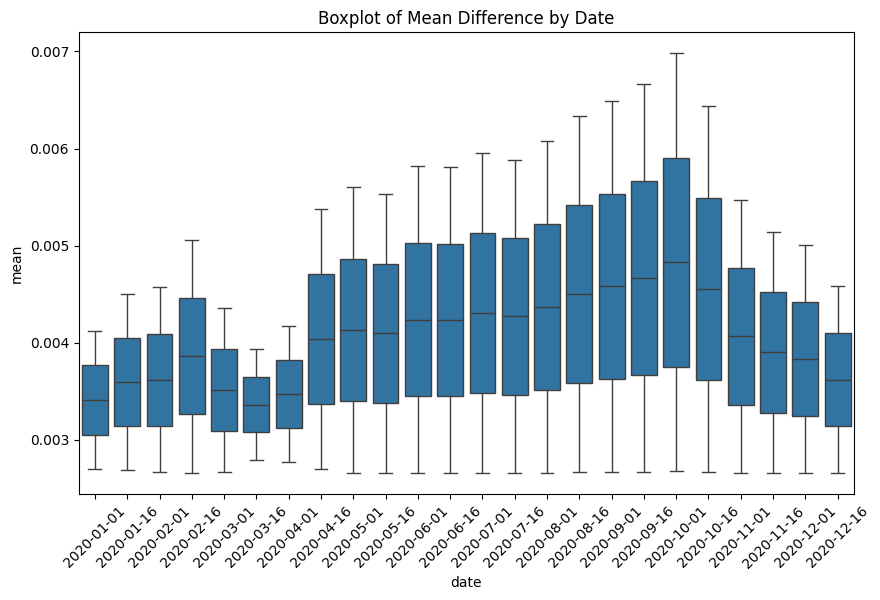

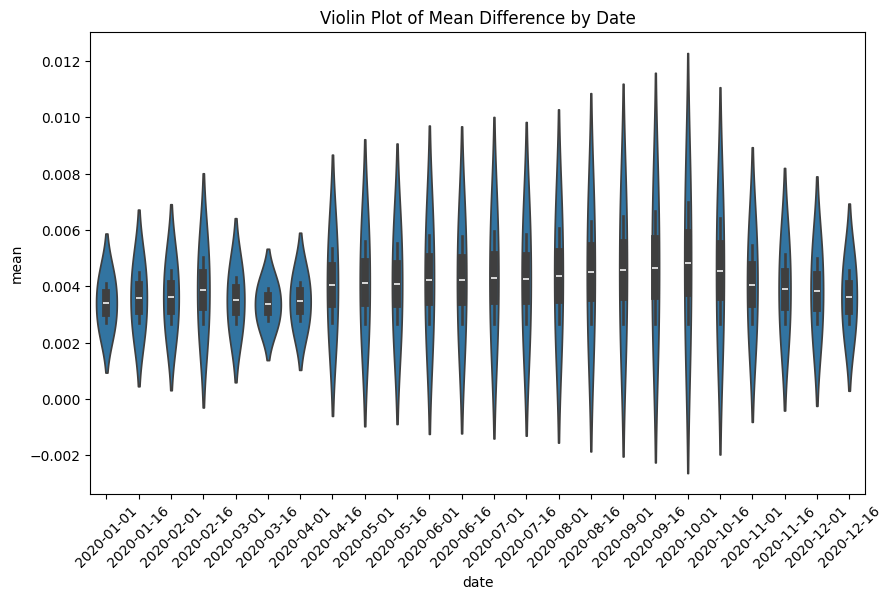

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="date", y="mean", data=df_stats)
plt.xticks(rotation=45)
plt.title("Boxplot of Mean Difference by Date")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="date", y="mean", data=df_stats)
plt.xticks(rotation=45)
plt.title("Violin Plot of Mean Difference by Date")
plt.show()

# Single File Debug

In [33]:
# Define file paths.
untreated_file = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Untreated\2020-01-01\Iteration_00\Predict_LMH.tif"
treated_file   = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Treated\2020-01-01\Iteration_00\Predict_LMH.tif"
diff_output    = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Difference\2020-01-01\Predict_LMH_diff.tif"

# Open the untreated raster.
with rasterio.open(untreated_file) as src_unt:
    untreated_data = src_unt.read(1)  # returns a 2D array
    profile = src_unt.profile

# Open the treated raster.
with rasterio.open(treated_file) as src_tr:
    treated_data = src_tr.read(1)

# Ensure the shapes match.
if untreated_data.shape != treated_data.shape:
    raise ValueError("The input rasters have different dimensions!")

# Compute the difference: untreated - treated.
diff_data = untreated_data - treated_data

# Ensure the output directory exists.
os.makedirs(os.path.dirname(diff_output), exist_ok=True)

# Write the difference to a new file.
with rasterio.open(diff_output, 'w', **profile) as dst:
    dst.write(diff_data, 1)

print("Difference file saved to:", diff_output)

Difference file saved to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\30m LUCAS LULC\Difference\2020-01-01\Predict_LMH_diff.tif


In [7]:
# Define file paths.
untreated_file = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_untreated.tif"
treated_file   = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_treated.tif"
diff_output    = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_diff.tif"

Saved difference map to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_diff.tif


In [8]:
# Output paths.
diff_output    = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_diff.tif"
cropped_output = r"C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_diff_cropped.tif"


In [9]:
# 1. Compute the difference.
with rasterio.open(untreated_file) as src_unt:
    untreated_data = src_unt.read(1)  # 2D array (height, width)
    profile = src_unt.profile
with rasterio.open(treated_file) as src_tr:
    treated_data = src_tr.read(1)

if untreated_data.shape != treated_data.shape:
    raise ValueError("Dimension mismatch between untreated and treated rasters!")

# Compute difference (untreated - treated).
diff_data = untreated_data - treated_data

# Ensure the output directory exists.
os.makedirs(os.path.dirname(diff_output), exist_ok=True)

# Write the continuous difference file.
with rasterio.open(diff_output, 'w', **profile) as dst:
    dst.write(diff_data, 1)
print("Saved continuous difference file to:", diff_output)
      
# 2. Crop the difference file using vector layer "small_group_union" from the geopackage.
gpkg_file = r"C:\Users\bsf31\Documents\data\NL050\disaster_resilience.gpkg"
layer_name = "small_group_union"

# Read the vector layer.
gdf = gpd.read_file(gpkg_file, layer=layer_name)
# Reproject the vector data to match the raster CRS if needed.
if gdf.crs != profile['crs']:
    gdf = gdf.to_crs(profile['crs'])

# Get the combined geometry.
geom = gdf.unary_union

# Open the difference file and crop it.
with rasterio.open(diff_output) as src:
    out_image, out_transform = mask(src, [geom], crop=True, nodata=profile.get('nodata'))
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

# Ensure the output directory exists.
os.makedirs(os.path.dirname(cropped_output), exist_ok=True)

# Write the cropped difference file.
with rasterio.open(cropped_output, "w", **out_meta) as dst:
    dst.write(out_image)
print("Saved cropped difference file to:", cropped_output)

Saved continuous difference file to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_diff.tif
Saved cropped difference file to: C:\Users\bsf31\Documents\data\NL050\30m LUCAS LULC\clipped\2020-06-01\predict_lmh060120_diff_cropped.tif


C:\Users\bsf31\AppData\Local\Temp\ipykernel_20972\4024441495.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom = gdf.unary_union
